# Loading and visualizing the data

## Loading the data

In [1]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
%matplotlib inline

df = read_csv('resources/dataset.csv')

## Visualizing the data before normalization

In [2]:
from matplotlib import pyplot as plt

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [4]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [6]:
# All diseases entries
diseasesEntries = df['Disease']

# List of all diseases
diseases = diseasesEntries.unique()

# All symptoms entries
symptomsEntries = df[df.columns.difference(['Disease'])].stack()

# List of all symptoms
symptoms = symptomsEntries.unique()

### Number of symptoms per entry

3     348
4     858
5     780
6     666
7     324
8     252
9     180
10    318
11    450
12    240
13    198
14     66
15     48
16    120
17     72
dtype: int64


<Axes: ylabel='Frequency'>

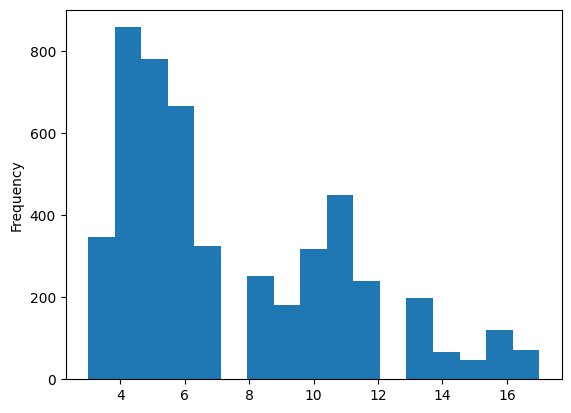

In [7]:
number_of_symptoms_per_entry = df.iloc[:, 1:].count(axis=1)
print(number_of_symptoms_per_entry.value_counts().sort_index())
number_of_symptoms_per_entry.plot(kind='hist', bins=17)

### Number of entries per disease

<Axes: >

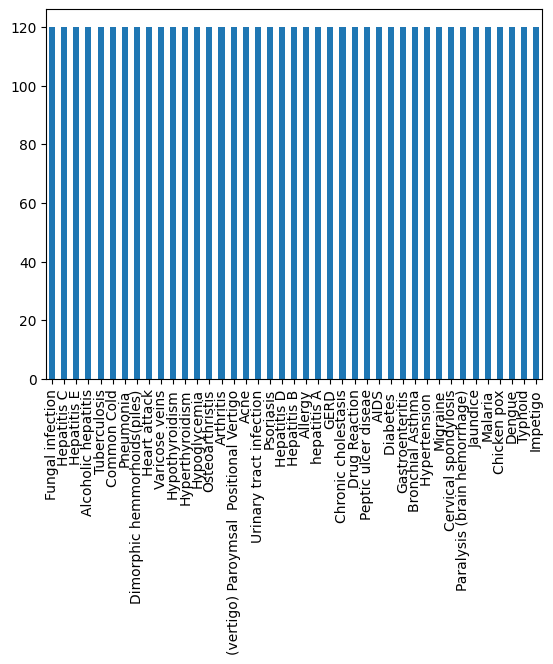

In [8]:
number_of_entries_per_disease = df['Disease'].value_counts()
number_of_entries_per_disease.plot.bar()

In [9]:
number_of_entries_per_disease.describe()

count     41.0
mean     120.0
std        0.0
min      120.0
25%      120.0
50%      120.0
75%      120.0
max      120.0
Name: Disease, dtype: float64

## One hot encoding

### Conversion

#### 1. From `Symptom_1` to `Symptom_17` to `Symptoms`




Convert from
```json
{
    "Disease": ["String"],
    "Symptom_1": ["String"],
    "...":["String"],
    "Symptom_17": ["String"]
} 
```
to
```json
{
    "Disease": ["String"], 
    "Symptoms": [["String"]]
}
```

In [10]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

symptom_cols = [col for col in df if col.startswith('Symptom_')]
df_converted = df.apply(lambda row: [symptoms for symptoms in row[symptom_cols] if pd.notnull(symptoms)], axis=1).to_frame(name='Symptoms')
df_converted['Disease'] = diseasesEntries
df_converted = df_converted[['Disease', 'Symptoms']]
df_converted.head()


,Disease,Symptoms
0,Fungal infection,"[itching, skin_rash, nodal_skin_eruptions, ..."
1,Fungal infection,"[ skin_rash, nodal_skin_eruptions, dischromi..."
2,Fungal infection,"[itching, nodal_skin_eruptions, dischromic _..."
3,Fungal infection,"[itching, skin_rash, dischromic _patches]"
4,Fungal infection,"[itching, skin_rash, nodal_skin_eruptions]"


#### 2. From `Symptoms` to `Symptoms_one_hot`

In [12]:
Symptoms_one_hot = pd.get_dummies(df_converted['Symptoms'].apply(pd.Series).stack()).groupby(level=0).sum()
Symptoms_one_hot.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### 3. From `Diease` to `Disease_one_hot`

In [13]:
Disease_one_hot = pd.get_dummies(df_converted['Disease'])
Disease_one_hot.head()

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Merging

In [14]:
df_one_hot = pd.concat([Symptoms_one_hot, Disease_one_hot], axis=1)

symptoms_cols_range = range(0, len(symptoms))
diseases_cols_range = range(len(symptoms), len(symptoms) + len(diseases))

df_one_hot.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizing the data after normalization

### Similarity between entries of the same disease

count    41.000000
mean      0.335272
std       0.255009
min       0.069231
25%       0.123077
50%       0.230769
75%       0.561538
max       0.930769
dtype: float64


<Axes: >

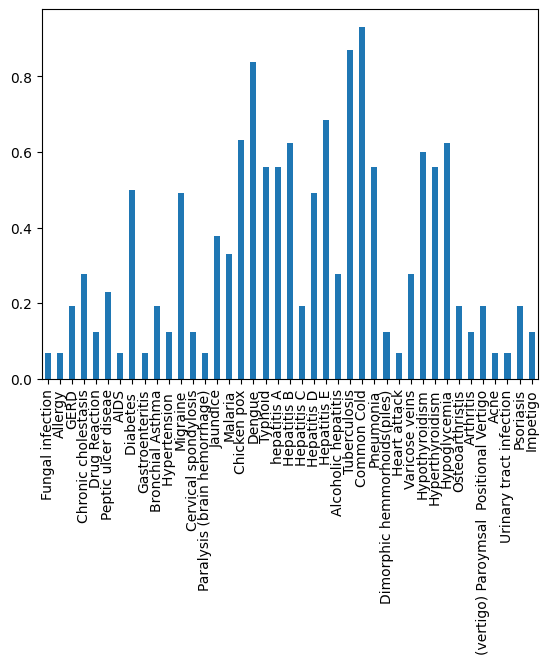

In [15]:
# Similarity between entries of the same disease, as a percentage

def similarity_between_entries_of_the_same_disease(df):
    # Disease -> Similarity between entries of the same disease
    diseases_similarity = {}
    for disease in diseases:
        # Get all entries of the disease
        disease_entries = df[df[disease] == 1]
        if disease_entries.empty:
            continue
        # Get the number of unique entries
        unique_entries = disease_entries.drop_duplicates()
        # Get unique entries as a list of symptoms (strings)
        unique_entries_strings = []
        for index, row in unique_entries.iterrows():
            unique_entries_strings.append(row[symptoms_cols_range].idxmax())
        # Get the number of common symptoms between each unique entry
        for index, row in unique_entries.iterrows():
            # Get the number of common symptoms between the current entry and the other entries
            common_symptoms = 0
            for index2, row2 in unique_entries.iterrows():
                if index == index2:
                    continue
                common_symptoms += row[symptoms_cols_range].dot(row2[symptoms_cols_range])
            # Get the similarity between the current entry and the other entries
            similarity = common_symptoms / (len(symptoms) - 1)
            # Add the similarity to the dictionary
            diseases_similarity[disease] = similarity
    return diseases_similarity

similarity = similarity_between_entries_of_the_same_disease(df_one_hot)
similarity = pd.Series(similarity)
print(similarity.describe())
similarity.plot.bar()

# Models

## Train and test split

In [104]:
print(df_one_hot.shape)
df_one_hot_without_duplicates = df_one_hot.drop_duplicates()
    
print(df_one_hot_without_duplicates.shape)
X = df_one_hot_without_duplicates.iloc[:, 0:len(symptoms)]
y = df_one_hot_without_duplicates.iloc[:, len(symptoms):len(symptoms) + len(diseases)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

(4920, 172)
(304, 172)


## Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y_train_labels = y_train.idxmax(axis=1)
y_test_labels = y_test.idxmax(axis=1)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train_labels)

y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test_labels))
print(accuracy_score(y_test_labels, y_pred))

from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True)).transpose()
classification_report_df


1.0
1.0


,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.0,1.0,1.0,3.0
AIDS,1.0,1.0,1.0,1.0
Acne,1.0,1.0,1.0,3.0
Alcoholic hepatitis,1.0,1.0,1.0,2.0
Allergy,1.0,1.0,1.0,4.0
Arthritis,1.0,1.0,1.0,2.0
Bronchial Asthma,1.0,1.0,1.0,4.0
Cervical spondylosis,1.0,1.0,1.0,2.0
Chicken pox,1.0,1.0,1.0,6.0
Chronic cholestasis,1.0,1.0,1.0,5.0


## KNN

best mean cross-validation score: 0.984
best parameters: {'n_neighbors': 1}
test-set score: 0.992
accuracy: 0.99


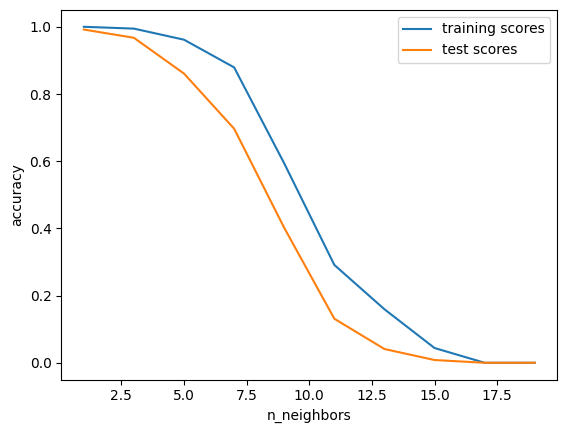

In [106]:
from sklearn.neighbors import KNeighborsClassifier

#Model complexity
neighbors = range(1, 20, 2)

training_scores = []
test_scores = []

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid_knn = {'n_neighbors': np.arange(1, 20, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn,
                    cv=5, return_train_score=True)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

# KNN with the best parameters
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors']) 
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)


## Decision Tree

## Random Forest